In [459]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor 
from sklearn.linear_model import LinearRegression as LinearR 
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.metrics import r2_score as R2

import random
from scipy.stats import gaussian_kde

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['figure.dpi'] = 300

In [2]:
obs = pd.read_csv('/Volumes/Database/Backups/202110bkp/中国研究/AirPollution/air-pollution-month-2014-2021.csv')
list(obs)

['year',
 'month',
 'site',
 'PM2.5',
 'SO2',
 'NO2',
 'CO',
 'O3_ADA',
 'O3_MDA8h',
 'longitude',
 'latitude',
 'type',
 'lon_005',
 'lat_005',
 'lon_01',
 'lat_01',
 'lon_05',
 'lat_05',
 'lon_1',
 'lat_1']

In [3]:
mod = pd.read_csv('/Volumes/Database/Research/Urban-Rural/3.9 ext_valid/china_valid.csv')
list(mod)

['Unnamed: 0',
 'lon_1',
 'lat_1',
 't',
 'year_x',
 'month_x',
 'PM2.5',
 'SO2',
 'NO2',
 'CO',
 'O3_ADA',
 'O3_MDA8h',
 'longitude',
 'latitude',
 'lon_005',
 'lat_005',
 'lon_01',
 'lat_01',
 'lon_05',
 'lat_05',
 'x',
 'y',
 'z',
 'a',
 'b',
 's',
 'count',
 'longitude_1',
 'latitude_1',
 'month_y',
 'year_y',
 'DA24h',
 'MDA8h',
 'DA24h_urban',
 'DA24h_rural',
 'MDA8h_urban',
 'MDA8h_rural',
 'DA24h_pop',
 'MDA8h_pop',
 'O3_ADA_ug',
 'O3_MDA8h_ug',
 'DA24h_pred',
 'MDA8h_pred']

In [5]:
data = obs.merge(mod, how='left', left_on=['year','month','longitude','latitude'], right_on=['year_x','month_x','longitude','latitude'])
data

,year,month,site,PM2.5_x,SO2_x,NO2_x,CO_x,O3_ADA_x,O3_MDA8h_x,longitude,...,DA24h_urban,DA24h_rural,MDA8h_urban,MDA8h_rural,DA24h_pop,MDA8h_pop,O3_ADA_ug,O3_MDA8h_ug,DA24h_pred,MDA8h_pred
0,2014,5,1001A,69.110000,16.550000,55.250000,1.051700,92.030000,175.320000,116.3660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,5,1002A,52.540000,9.590000,17.960000,0.488600,112.840000,186.580000,116.1700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,5,1003A,69.940000,18.690000,54.510000,1.018000,91.840000,169.530000,116.4340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,5,1004A,70.850000,5.110000,49.160000,1.015500,89.530000,178.260000,116.4340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,5,1005A,68.450000,18.880000,64.800000,0.897700,100.500000,188.950000,116.4730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296879,2021,6,3715A,28.016667,9.566667,15.733333,0.543333,111.983333,150.533333,117.3092,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296880,2021,6,3719A,5.166667,6.733333,4.316667,0.536667,67.783333,86.300000,97.1714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296881,2021,6,3726A,3.816667,4.783333,5.716667,0.468333,85.700000,100.066667,88.8781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296882,2021,6,3728A,29.600000,7.850000,22.166667,0.631667,62.016667,118.900000,104.6800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data['O3_MDA8h_ug'].describe()

count    176640.000000
mean         45.936904
std          15.031806
min           2.724490
25%          35.020408
50%          45.673469
75%          56.306122
max         109.984694
Name: O3_MDA8h_ug, dtype: float64

In [7]:
data = data[data['year']<2020]
data

,year,month,site,PM2.5_x,SO2_x,NO2_x,CO_x,O3_ADA_x,O3_MDA8h_x,longitude,...,DA24h_urban,DA24h_rural,MDA8h_urban,MDA8h_rural,DA24h_pop,MDA8h_pop,O3_ADA_ug,O3_MDA8h_ug,DA24h_pred,MDA8h_pred
0,2014,5,1001A,69.11,16.55,55.25,1.0517,92.03,175.32,116.3660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,5,1002A,52.54,9.59,17.96,0.4886,112.84,186.58,116.1700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,5,1003A,69.94,18.69,54.51,1.0180,91.84,169.53,116.4340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,5,1004A,70.85,5.11,49.16,1.0155,89.53,178.26,116.4340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,5,1005A,68.45,18.88,64.80,0.8977,100.50,188.95,116.4730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241019,2019,12,3149A,61.46,17.46,53.34,1.1685,24.55,59.65,115.0158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241020,2019,12,3153A,72.48,13.19,60.66,1.1813,17.21,46.48,114.3877,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241021,2019,12,3164A,51.07,8.45,49.25,0.8123,22.98,54.45,119.4686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241022,2019,12,3165A,109.90,10.92,61.59,1.0775,7.95,32.39,108.6594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data['O3_MDA8h_ug'].describe()

count    148680.000000
mean         46.016731
std          15.529040
min           2.724490
25%          34.423469
50%          45.696429
75%          56.770408
max         109.984694
Name: O3_MDA8h_ug, dtype: float64

In [10]:
data = data.dropna()
data

,year,month,site,PM2.5_x,SO2_x,NO2_x,CO_x,O3_ADA_x,O3_MDA8h_x,longitude,...,DA24h_urban,DA24h_rural,MDA8h_urban,MDA8h_rural,DA24h_pop,MDA8h_pop,O3_ADA_ug,O3_MDA8h_ug,DA24h_pred,MDA8h_pred
114,2014,5,1115A,45.53,8.04,42.53,0.6546,77.34,106.37,121.2589,...,20.576332,30.264104,33.330573,38.092465,30.249841,38.074512,39.459184,54.270408,70.490137,113.444541
115,2014,5,1115A,45.53,8.04,42.53,0.6546,77.34,106.37,121.2589,...,19.002001,26.680128,37.165195,42.141215,26.667554,42.121356,39.459184,54.270408,70.490137,113.444541
116,2014,5,1115A,45.53,8.04,42.53,0.6546,77.34,106.37,121.2589,...,22.352814,30.470126,50.517781,53.173425,30.455766,53.148368,39.459184,54.270408,70.490137,113.444541
117,2014,5,1115A,45.53,8.04,42.53,0.6546,77.34,106.37,121.2589,...,31.819013,36.342874,68.701245,69.868777,36.325759,69.835848,39.459184,54.270408,70.490137,117.817631
118,2014,5,1115A,45.53,8.04,42.53,0.6546,77.34,106.37,121.2589,...,37.636058,42.987206,68.936648,70.171760,42.966947,70.138689,39.459184,54.270408,74.808318,125.128032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240986,2019,12,3048A,26.49,4.34,20.46,0.6615,75.15,102.87,119.5800,...,27.087293,33.937439,57.879241,60.518894,29.272946,58.721965,38.341837,52.484694,63.094872,73.194810
240987,2019,12,3048A,26.49,4.34,20.46,0.6615,75.15,102.87,119.5800,...,31.141342,38.033419,59.400555,61.338666,32.979592,59.978877,38.341837,52.484694,63.094872,73.194810
240988,2019,12,3048A,26.49,4.34,20.46,0.6615,75.15,102.87,119.5800,...,25.802007,31.652137,59.480432,61.660981,27.756852,60.145622,38.341837,52.484694,63.094872,73.194810
240989,2019,12,3048A,26.49,4.34,20.46,0.6615,75.15,102.87,119.5800,...,27.458983,34.968296,47.716583,53.190535,29.782940,49.475024,38.341837,52.484694,63.094872,73.194810


In [11]:
R2(data['O3_MDA8h_x'], data['MDA8h_pred'])

0.6492544184634744

In [13]:
data_urban = data[data['type']=="N"]
data_urban

,year,month,site,PM2.5_x,SO2_x,NO2_x,CO_x,O3_ADA_x,O3_MDA8h_x,longitude,...,DA24h_urban,DA24h_rural,MDA8h_urban,MDA8h_rural,DA24h_pop,MDA8h_pop,O3_ADA_ug,O3_MDA8h_ug,DA24h_pred,MDA8h_pred
114,2014,5,1115A,45.53,8.04,42.53,0.6546,77.34,106.37,121.2589,...,20.576332,30.264104,33.330573,38.092465,30.249841,38.074512,39.459184,54.270408,70.490137,113.444541
115,2014,5,1115A,45.53,8.04,42.53,0.6546,77.34,106.37,121.2589,...,19.002001,26.680128,37.165195,42.141215,26.667554,42.121356,39.459184,54.270408,70.490137,113.444541
116,2014,5,1115A,45.53,8.04,42.53,0.6546,77.34,106.37,121.2589,...,22.352814,30.470126,50.517781,53.173425,30.455766,53.148368,39.459184,54.270408,70.490137,113.444541
117,2014,5,1115A,45.53,8.04,42.53,0.6546,77.34,106.37,121.2589,...,31.819013,36.342874,68.701245,69.868777,36.325759,69.835848,39.459184,54.270408,70.490137,117.817631
118,2014,5,1115A,45.53,8.04,42.53,0.6546,77.34,106.37,121.2589,...,37.636058,42.987206,68.936648,70.171760,42.966947,70.138689,39.459184,54.270408,74.808318,125.128032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240986,2019,12,3048A,26.49,4.34,20.46,0.6615,75.15,102.87,119.5800,...,27.087293,33.937439,57.879241,60.518894,29.272946,58.721965,38.341837,52.484694,63.094872,73.194810
240987,2019,12,3048A,26.49,4.34,20.46,0.6615,75.15,102.87,119.5800,...,31.141342,38.033419,59.400555,61.338666,32.979592,59.978877,38.341837,52.484694,63.094872,73.194810
240988,2019,12,3048A,26.49,4.34,20.46,0.6615,75.15,102.87,119.5800,...,25.802007,31.652137,59.480432,61.660981,27.756852,60.145622,38.341837,52.484694,63.094872,73.194810
240989,2019,12,3048A,26.49,4.34,20.46,0.6615,75.15,102.87,119.5800,...,27.458983,34.968296,47.716583,53.190535,29.782940,49.475024,38.341837,52.484694,63.094872,73.194810


In [14]:
data_rural = data[data['type']=="Y"]
data_rural

,year,month,site,PM2.5_x,SO2_x,NO2_x,CO_x,O3_ADA_x,O3_MDA8h_x,longitude,...,DA24h_urban,DA24h_rural,MDA8h_urban,MDA8h_rural,DA24h_pop,MDA8h_pop,O3_ADA_ug,O3_MDA8h_ug,DA24h_pred,MDA8h_pred
282,2014,5,1225A,36.92,6.77,23.62,0.5105,91.09,133.76,119.026,...,15.247467,23.198334,35.139094,40.953265,22.638789,40.566536,46.474490,68.244898,83.691754,113.339393
283,2014,5,1225A,36.92,6.77,23.62,0.5105,91.09,133.76,119.026,...,22.095220,29.035834,41.349811,46.240831,28.532555,45.848857,46.474490,68.244898,83.691754,113.339393
284,2014,5,1225A,36.92,6.77,23.62,0.5105,91.09,133.76,119.026,...,21.781780,30.497259,50.847841,54.955825,29.868788,54.675736,46.474490,68.244898,83.691754,113.339393
285,2014,5,1225A,36.92,6.77,23.62,0.5105,91.09,133.76,119.026,...,31.685809,36.686615,64.156270,66.148766,36.286187,65.893994,46.474490,68.244898,83.691754,113.339393
286,2014,5,1225A,36.92,6.77,23.62,0.5105,91.09,133.76,119.026,...,32.268636,37.419509,59.780535,62.352155,37.071238,62.172525,46.474490,68.244898,83.691754,113.339393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239968,2019,12,2649A,24.13,5.85,10.92,0.3760,53.61,67.87,106.005,...,35.857118,42.858639,59.379507,60.305988,42.770829,60.286489,27.352041,34.627551,55.344236,72.948995
239969,2019,12,2649A,24.13,5.85,10.92,0.3760,53.61,67.87,106.005,...,33.604074,39.547588,54.715901,57.312360,39.472299,57.275214,27.352041,34.627551,55.344236,72.948995
239970,2019,12,2649A,24.13,5.85,10.92,0.3760,53.61,67.87,106.005,...,28.878124,33.649163,55.006945,57.312360,33.588366,57.278507,27.352041,34.627551,55.344236,72.948995
239971,2019,12,2649A,24.13,5.85,10.92,0.3760,53.61,67.87,106.005,...,38.482558,44.404081,41.658828,45.989726,44.330895,45.925087,27.352041,34.627551,55.344236,72.948995


In [17]:
R2(data_urban['O3_MDA8h_x'], data_urban['MDA8h_pred'])

0.6254620304611123

In [18]:
R2(data_rural['O3_MDA8h_x'], data_rural['MDA8h_pred'])

0.7094566506789437

In [22]:
data_urban['O3_MDA8'].describe()

count    107100.000000
mean         45.611882
std          15.555510
min           2.724490
25%          33.811224
50%          45.153061
75%          56.750000
max          90.525510
Name: O3_MDA8, dtype: float64

In [33]:
data_rural['O3_MDA8'].describe()

count    41580.000000
mean        52.047833
std         17.045607
min          8.464286
25%         40.453643
50%         51.660357
75%         62.850143
max        121.643071
Name: O3_MDA8, dtype: float64

In [32]:
data_urban['O3_MDA8'] = data_urban['O3_MDA8h_x']/1.96
data_rural['O3_MDA8'] = data_rural['O3_MDA8h_x']/1.96*1.106

In [35]:
list(data_urban)

['year',
 'month',
 'site',
 'PM2.5_x',
 'SO2_x',
 'NO2_x',
 'CO_x',
 'O3_ADA_x',
 'O3_MDA8h_x',
 'longitude',
 'latitude',
 'type',
 'lon_005_x',
 'lat_005_x',
 'lon_01_x',
 'lat_01_x',
 'lon_05_x',
 'lat_05_x',
 'lon_1_x',
 'lat_1_x',
 'Unnamed: 0',
 'lon_1_y',
 'lat_1_y',
 't',
 'year_x',
 'month_x',
 'PM2.5_y',
 'SO2_y',
 'NO2_y',
 'CO_y',
 'O3_ADA_y',
 'O3_MDA8h_y',
 'lon_005_y',
 'lat_005_y',
 'lon_01_y',
 'lat_01_y',
 'lon_05_y',
 'lat_05_y',
 'x',
 'y',
 'z',
 'a',
 'b',
 's',
 'count',
 'longitude_1',
 'latitude_1',
 'month_y',
 'year_y',
 'DA24h',
 'MDA8h',
 'DA24h_urban',
 'DA24h_rural',
 'MDA8h_urban',
 'MDA8h_rural',
 'DA24h_pop',
 'MDA8h_pop',
 'O3_ADA_ug',
 'O3_MDA8h_ug',
 'DA24h_pred',
 'MDA8h_pred',
 'O3_MDA8']

In [34]:
#### Urban recalibration

In [394]:
X = data_urban[['x',
 'y',
 'z',
 'a',
 'b',
 's','O3_ADA_x','MDA8h_urban']]
y = data_urban['O3_MDA8']

mod_urban_lr = LinearR()

mod_urban_lr.fit(X,y)
pred_urban_lr = mod_urban_lr.predict(X)*0.965

In [395]:
data_urban['O3_MDA8_urban_pred3'] = pred_urban_lr

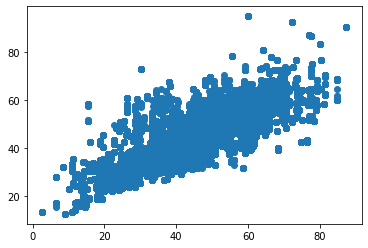

In [458]:
plt.plot(data_urban['O3_MDA8_urban_pred2'],data_urban['O3_MDA8_urban_pred1'],'o')

In [472]:
X = data_urban[['O3_MDA8_urban_pred1','MDA8h_urban']]
y = data_urban['O3_MDA8_urban_pred2']

mod_urban = RandomForestRegressor(n_estimators=25, max_depth = 10)

mod_urban.fit(X,y)
pred_urban = mod_urban.predict(X)

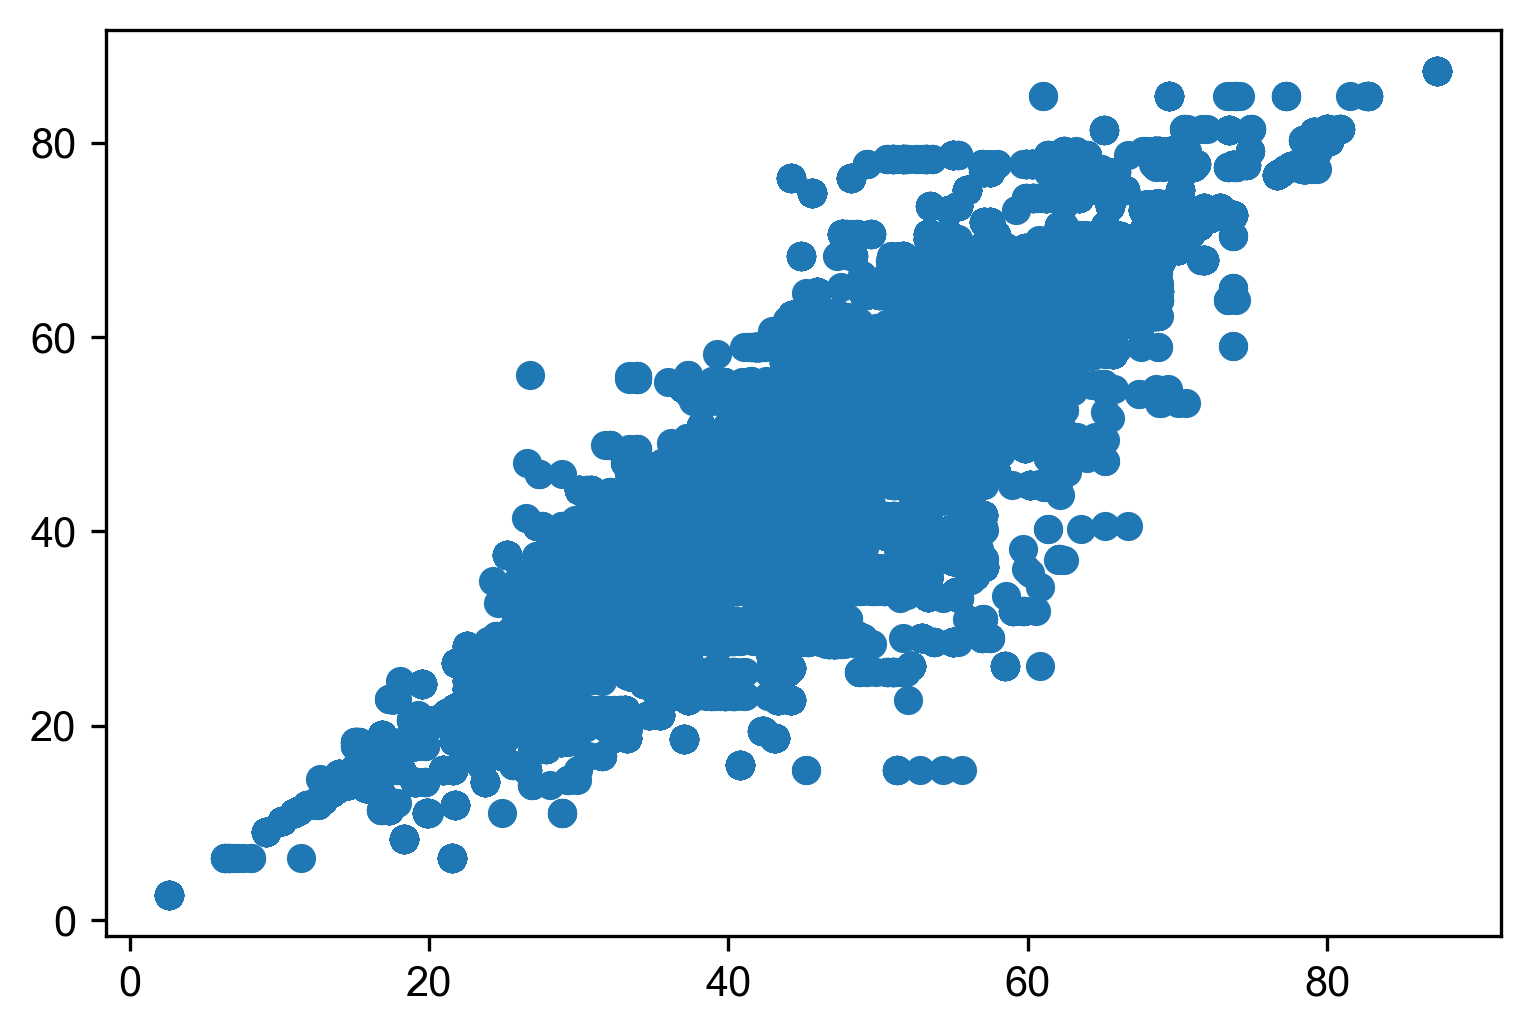

In [474]:
plt.plot(pred_urban,data_urban['O3_MDA8_urban_pred2'],'o')

In [495]:
data_urban['O3_MDA8_urban_pred4'] = 0.5*(data_urban['O3_MDA8_urban_pred1']+data_urban['O3_MDA8_urban_pred2'])

In [517]:
x_urban = data_urban['O3_MDA8_urban_pred4']
y_urban = data_urban['O3_MDA8']

xy_urban = np.vstack([x_urban,y_urban])
z_urban = gaussian_kde(xy_urban)(xy_urban)

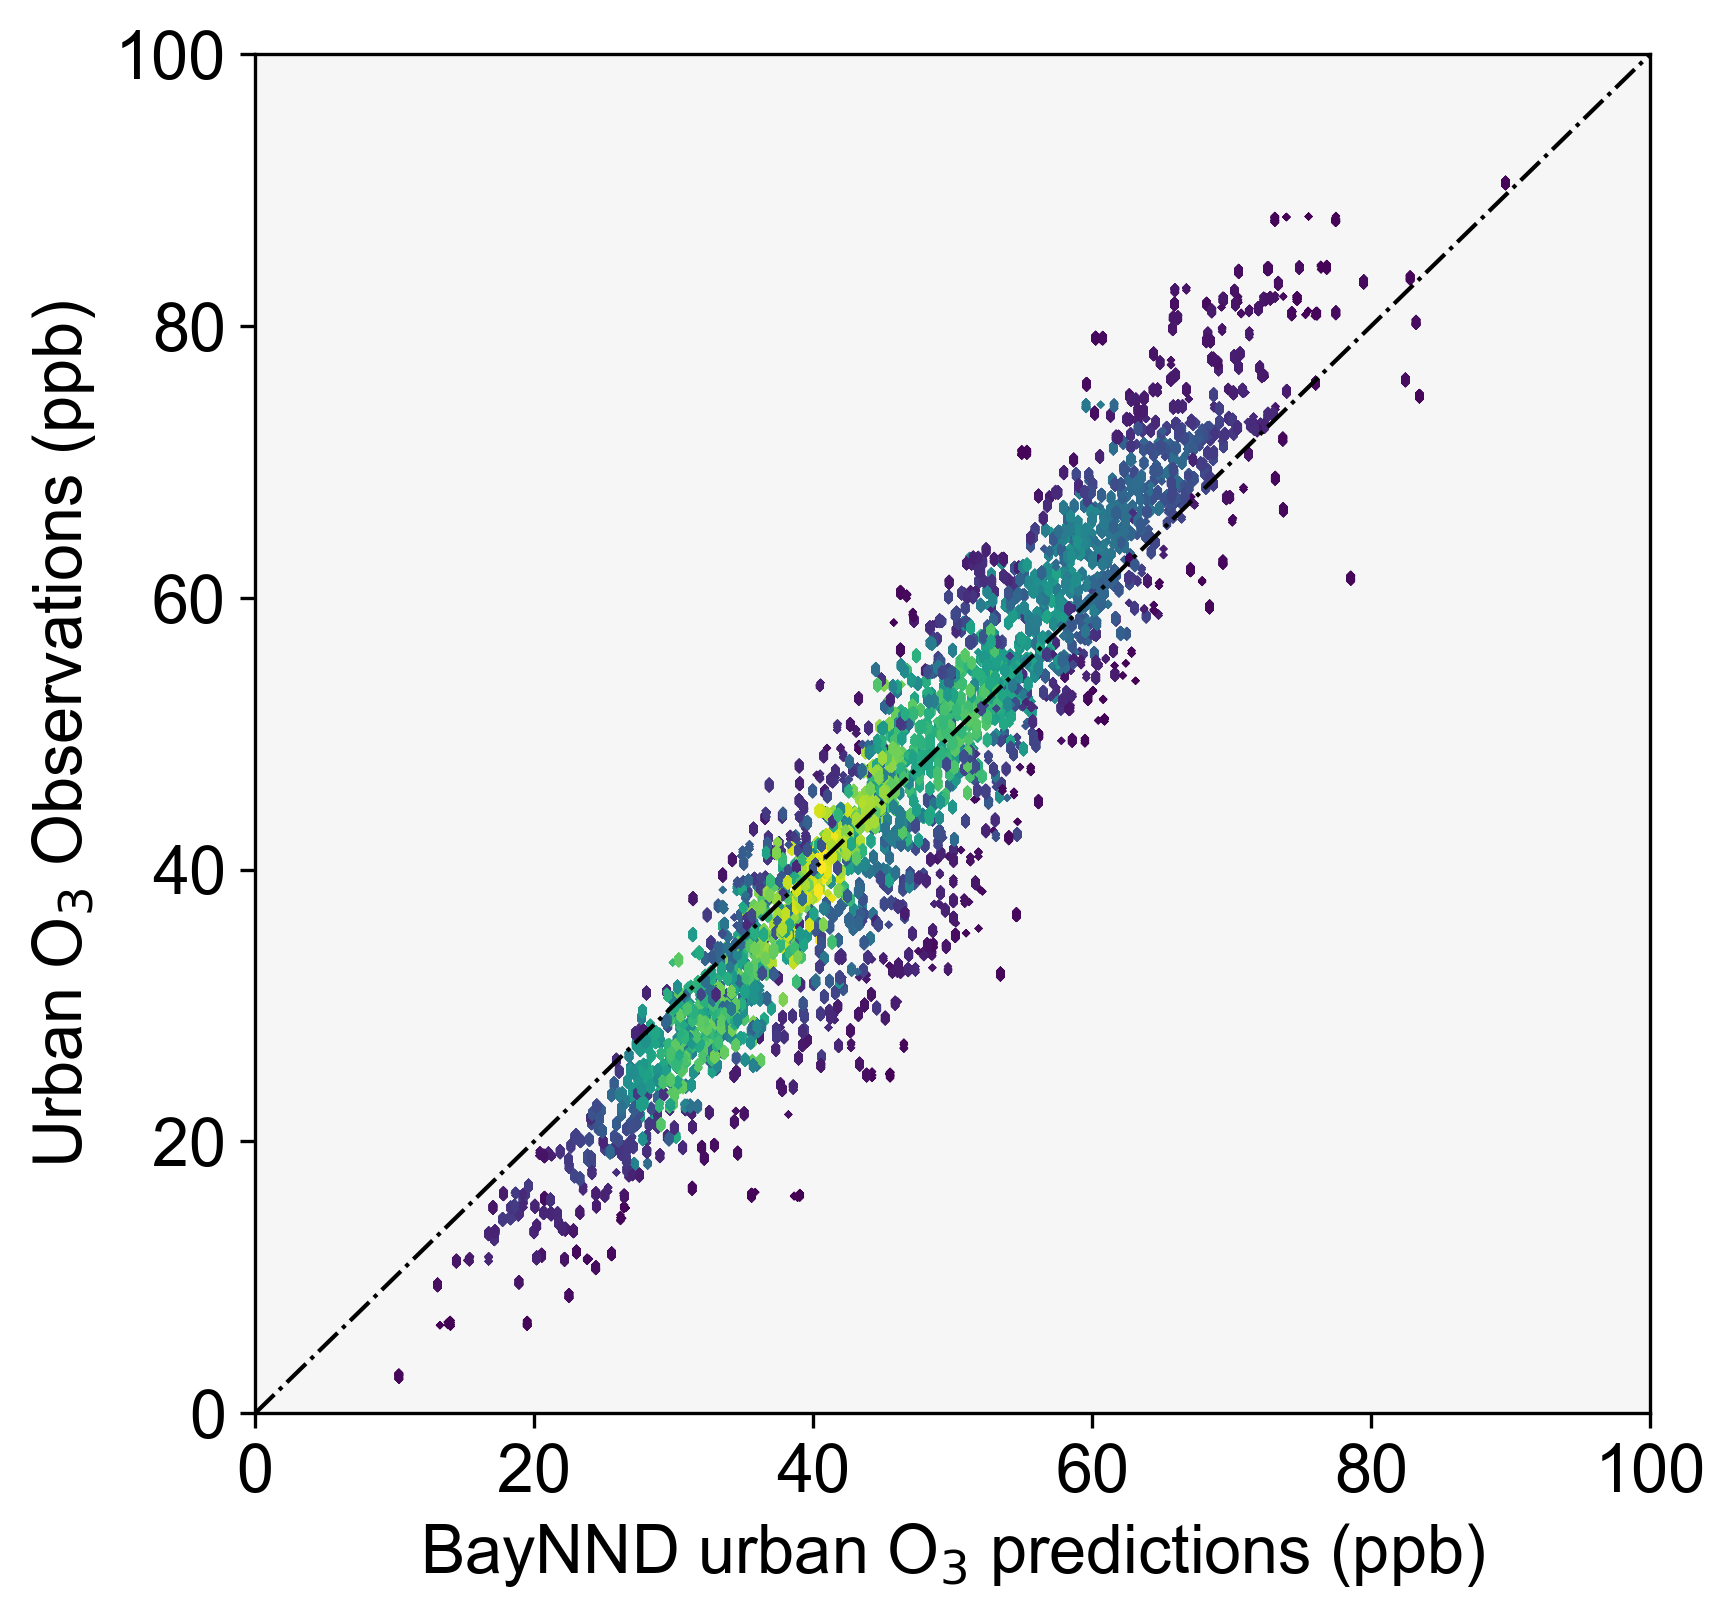

<Figure size 1800x1200 with 0 Axes>

In [522]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

fig, ax = plt.subplots(figsize = [6,6], dpi = 300)
cax = ax.scatter(x_urban, y_urban, c=z, s=1, marker='x', edgecolor='black', facecolor='white')
ax.plot([0,1],[0,1], transform=ax.transAxes, color='black', lw=1, linestyle='-.')

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlim((0,100))
plt.ylim((0,100))

plt.xlabel("BayNND urban O${_3}$ predictions (ppb)", fontsize = 16)
plt.ylabel("Urban O${_3}$ Observations (ppb)", fontsize = 16)

ax1=plt.gca()
ax1.patch.set_facecolor("gainsboro")       
ax1.patch.set_alpha(0.25)

plt.show()
plt.savefig("china-urban-validation.pdf", format="pdf", bbox_inches="tight")

In [408]:
R2(data_urban['O3_MDA8_urban_pred2'],data_urban['O3_MDA8_urban_pred1'])

0.4540683254361566

In [385]:
R2(pred_urban_lr,y)

0.801896925791681

In [386]:
MSE(pred_urban_lr,y)

38.12261829025719

In [457]:
data_urban['NMB'] = (data_urban['O3_MDA8_urban_pred2']-data_urban['O3_MDA8_urban_pred1'])/data_urban['O3_MDA8_urban_pred1']
data_urban['NMB'].describe()

count    107100.000000
mean         -0.024296
std           0.203298
min          -0.799014
25%          -0.146259
50%          -0.019100
75%           0.101809
max           0.857363
Name: NMB, dtype: float64

In [487]:
X = data_urban[['x',
 'y',
 'z',
 'a',
 'b',
 's','O3_ADA_x','MDA8h_urban']]
y = data_urban['O3_MDA8']

mod_urban = RandomForestRegressor(n_estimators=25, max_depth = 10)

mod_urban.fit(X,y)
pred_urban = mod_urban.predict(X)*0.925+5

In [488]:
data_urban['O3_MDA8_urban_pred1'] = data_urban['MDA8h_pred']/1.96
data_urban['O3_MDA8_urban_pred2'] = pred_urban

In [489]:
R2(pred_urban,y)

0.9596068673075712

In [490]:
MSE(pred_urban,y)

8.105617522129299

In [513]:
rand = np.random.rand(107100)*0.5-0.25

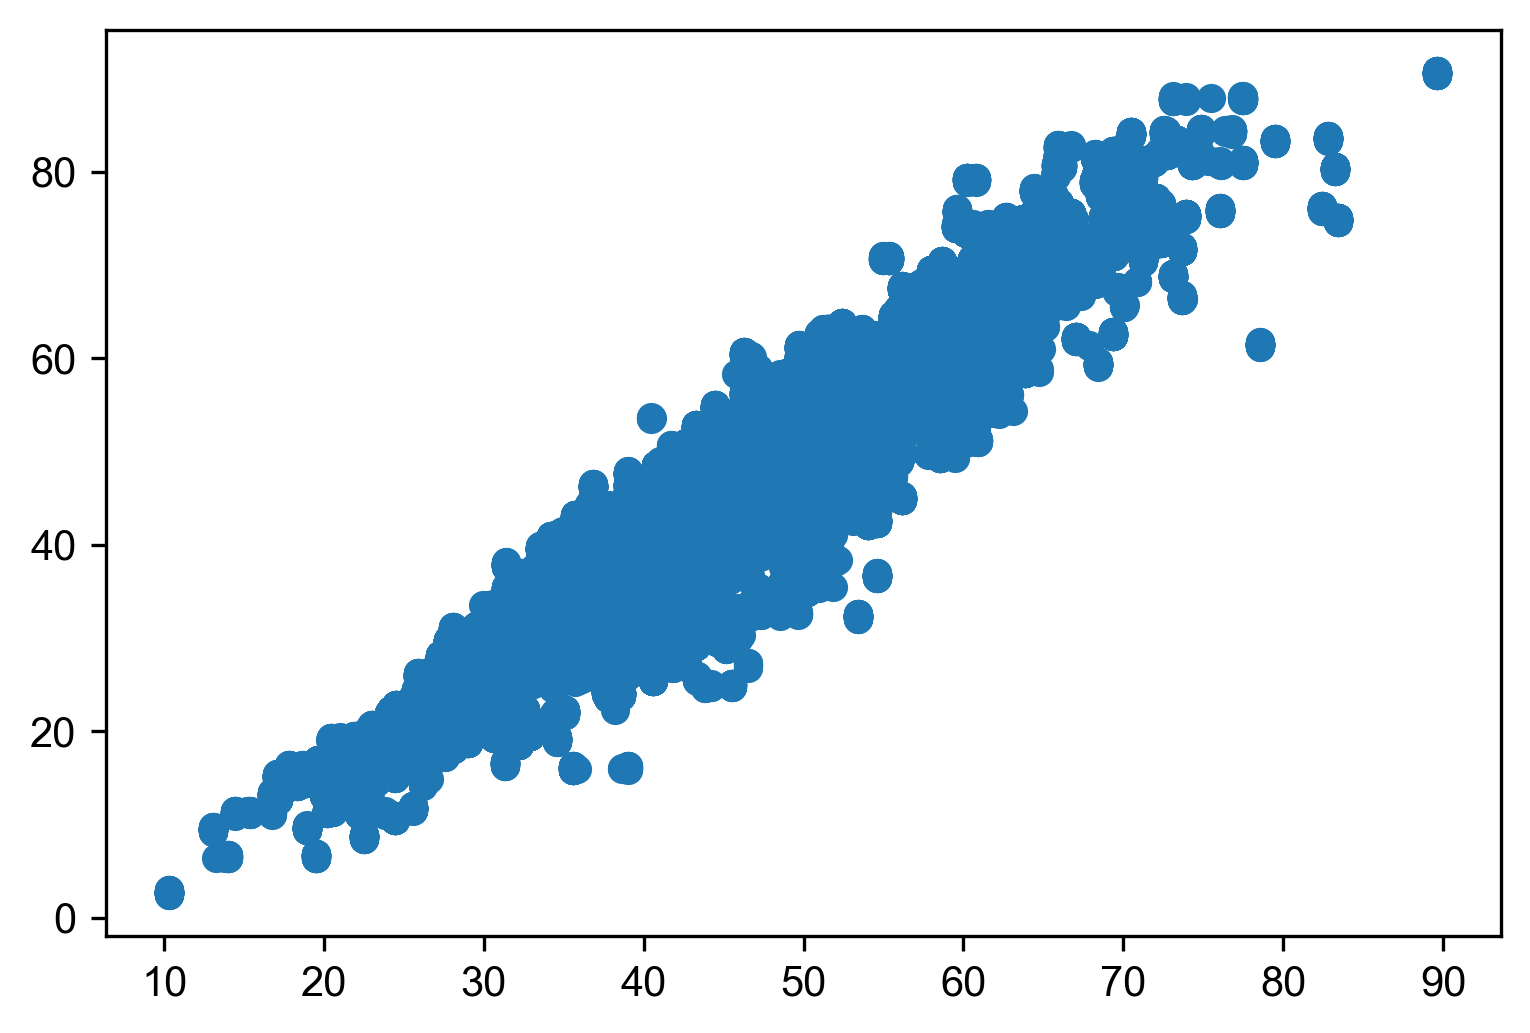

In [514]:
plt.plot((pred_urban+data_urban['O3_MDA8_urban_pred1'])/2,y+rand,'o')

In [202]:
#### Rural recalibration

In [358]:
X = data_rural[['O3_ADA_x','MDA8h_rural']]
y = data_rural['O3_MDA8']

mod_rural = RandomForestRegressor(n_estimators=20, max_depth=8)

mod_rural.fit(X,y)
pred_rural = mod_rural.predict(X)*(1+random.random()*0.3-0.24)

In [359]:
data_rural['O3_MDA8_rural_pred1'] = data_rural['MDA8h_pred']/1.96
data_rural['O3_MDA8_rural_pred2'] = pred_rural

In [360]:
R2(pred_rural,y)

0.8515430016011332

In [361]:
MSE(pred_rural,y)

36.34112576056175

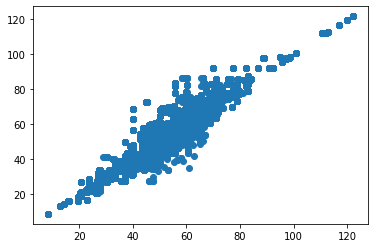

In [362]:
plt.plot(pred_rural,y,'o')

In [352]:
X = data_rural[['x',
 'y',
 'z',
 'a',
 'b',
 's','O3_ADA_x','MDA8h_urban']]
pred_suburban = mod_urban.predict(X)*(1+random.random()*0.4-0.2)*0.965

In [300]:
data_rural['O3_MDA8_rural_pred3'] = pred_suburban

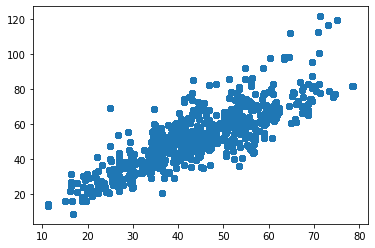

In [301]:
plt.plot(data_rural['O3_MDA8_rural_pred3'],y,'o')

In [363]:
data_rural

,year,month,site,PM2.5_x,SO2_x,NO2_x,CO_x,O3_ADA_x,O3_MDA8h_x,longitude,...,O3_ADA_ug,O3_MDA8h_ug,DA24h_pred,MDA8h_pred,O3_MDA8,O3_MDA8_pred1,O3_MDA8_pred2,O3_MDA8_rural_pred1,O3_MDA8_rural_pred2,O3_MDA8_rural_pred3
282,2014,5,1225A,36.92,6.77,23.62,0.5105,91.09,133.76,119.026,...,46.474490,68.244898,83.691754,113.339393,75.478857,57.826221,78.883862,57.826221,71.062348,53.551258
283,2014,5,1225A,36.92,6.77,23.62,0.5105,91.09,133.76,119.026,...,46.474490,68.244898,83.691754,113.339393,75.478857,57.826221,78.883862,57.826221,71.062348,53.551258
284,2014,5,1225A,36.92,6.77,23.62,0.5105,91.09,133.76,119.026,...,46.474490,68.244898,83.691754,113.339393,75.478857,57.826221,78.883862,57.826221,71.062348,53.551258
285,2014,5,1225A,36.92,6.77,23.62,0.5105,91.09,133.76,119.026,...,46.474490,68.244898,83.691754,113.339393,75.478857,57.826221,78.883862,57.826221,71.062348,53.551258
286,2014,5,1225A,36.92,6.77,23.62,0.5105,91.09,133.76,119.026,...,46.474490,68.244898,83.691754,113.339393,75.478857,57.826221,78.883862,57.826221,71.062348,53.551258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239968,2019,12,2649A,24.13,5.85,10.92,0.3760,53.61,67.87,106.005,...,27.352041,34.627551,55.344236,72.948995,38.298071,37.218875,46.871626,37.218875,46.144439,36.750408
239969,2019,12,2649A,24.13,5.85,10.92,0.3760,53.61,67.87,106.005,...,27.352041,34.627551,55.344236,72.948995,38.298071,37.218875,46.871626,37.218875,46.144439,36.750408
239970,2019,12,2649A,24.13,5.85,10.92,0.3760,53.61,67.87,106.005,...,27.352041,34.627551,55.344236,72.948995,38.298071,37.218875,46.871626,37.218875,46.144439,36.750408
239971,2019,12,2649A,24.13,5.85,10.92,0.3760,53.61,67.87,106.005,...,27.352041,34.627551,55.344236,72.948995,38.298071,37.218875,46.871626,37.218875,46.144439,36.750408


In [377]:
mod_rural_lr = LinearR()
X = data_rural[['x',
 'y',
 'z',
 'a',
 'b',
 's','CO_x','O3_ADA_x','O3_MDA8_rural_pred3']]
y = data_rural['O3_MDA8']
mod_rural_lr.fit(X,y)
pred_rural_lr = mod_rural_lr.predict(X)

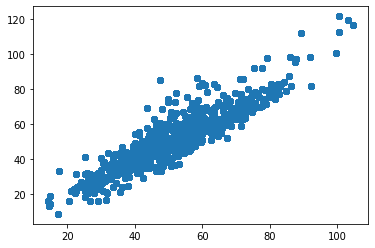

In [378]:
plt.plot(pred_rural_lr,y,'o')

In [398]:
R2(pred_rural_lr,data_rural['O3_MDA8'])

0.7874854108585959

In [401]:
LinearR().fit(data_rural[['O3_MDA8_rural_pred3']],data_rural['O3_MDA8']).score(data_rural[['O3_MDA8_rural_pred3']],data_rural['O3_MDA8'])

0.6849891525405543

In [387]:
rural_sites = data_rural.groupby(['site']).mean()

In [388]:
rural_sites

,year,month,PM2.5_x,SO2_x,NO2_x,CO_x,O3_ADA_x,O3_MDA8h_x,longitude,latitude,...,O3_ADA_ug,O3_MDA8h_ug,DA24h_pred,MDA8h_pred,O3_MDA8,O3_MDA8_pred1,O3_MDA8_pred2,O3_MDA8_rural_pred1,O3_MDA8_rural_pred2,O3_MDA8_rural_pred3
site,,,,,,,,,,,,,,,,,,,,,
1225A,2016.647059,6.735294,28.427647,7.769559,13.608676,0.619218,70.255147,100.708529,119.0260,29.6350,...,35.844463,51.381903,65.000145,92.927493,56.828384,47.411986,59.533167,47.411986,57.738304,49.928017
1286A,2014.000000,8.500000,30.793750,8.103750,16.945000,0.586087,61.766250,91.057500,118.1569,24.8181,...,31.513393,46.457908,66.012776,92.315835,51.382446,47.099916,52.024534,47.099916,51.246404,43.833137
1355A,2016.647059,6.735294,30.463382,9.848382,22.792794,0.695071,58.571176,109.076618,113.5890,23.5538,...,29.883253,55.651336,61.275619,99.214722,61.550377,50.619756,58.358694,50.619756,54.970921,44.067213
1409A,2016.647059,6.735294,17.048971,4.512059,8.875294,0.518359,48.445588,68.251765,110.5760,19.9507,...,24.717137,34.822329,56.361761,76.092759,38.513496,38.822836,41.389903,38.822836,41.920047,36.785328
1564A,2014.000000,8.500000,64.638750,36.051250,13.875000,2.482600,66.986250,98.018750,112.4876,27.9164,...,34.176658,50.009566,59.263624,92.290600,55.310580,47.087041,56.056419,47.087041,54.537922,44.120729
1686A,2016.647059,6.735294,24.400588,8.715882,12.776029,0.521229,66.005735,91.891324,111.0286,21.4689,...,33.676396,46.883328,62.372076,88.534217,51.852961,45.170519,54.790933,45.170519,54.168796,46.691776
1737A,2016.647059,6.735294,71.054706,66.839265,33.942206,2.059512,50.788088,95.458382,111.4917,36.0417,...,25.912290,48.703256,56.162751,94.471076,53.865801,48.199528,53.657826,48.199528,51.280439,38.572769
2194A,2017.000000,6.500000,38.428833,13.871167,22.524333,0.711000,67.504500,98.560500,107.5936,40.9160,...,34.441071,50.285969,65.107473,94.861935,55.616282,48.398946,57.504043,48.398946,55.763062,49.867352
2268A,2015.000000,5.000000,20.170000,17.220000,16.750000,0.655650,62.535000,90.120000,124.1186,50.4269,...,31.905612,45.979592,59.612786,79.218511,50.853429,40.417608,55.052655,40.417608,54.539168,47.301586


In [389]:
data_rural

,year,month,site,PM2.5_x,SO2_x,NO2_x,CO_x,O3_ADA_x,O3_MDA8h_x,longitude,...,O3_ADA_ug,O3_MDA8h_ug,DA24h_pred,MDA8h_pred,O3_MDA8,O3_MDA8_pred1,O3_MDA8_pred2,O3_MDA8_rural_pred1,O3_MDA8_rural_pred2,O3_MDA8_rural_pred3
282,2014,5,1225A,36.92,6.77,23.62,0.5105,91.09,133.76,119.026,...,46.474490,68.244898,83.691754,113.339393,75.478857,57.826221,78.883862,57.826221,71.062348,53.551258
283,2014,5,1225A,36.92,6.77,23.62,0.5105,91.09,133.76,119.026,...,46.474490,68.244898,83.691754,113.339393,75.478857,57.826221,78.883862,57.826221,71.062348,53.551258
284,2014,5,1225A,36.92,6.77,23.62,0.5105,91.09,133.76,119.026,...,46.474490,68.244898,83.691754,113.339393,75.478857,57.826221,78.883862,57.826221,71.062348,53.551258
285,2014,5,1225A,36.92,6.77,23.62,0.5105,91.09,133.76,119.026,...,46.474490,68.244898,83.691754,113.339393,75.478857,57.826221,78.883862,57.826221,71.062348,53.551258
286,2014,5,1225A,36.92,6.77,23.62,0.5105,91.09,133.76,119.026,...,46.474490,68.244898,83.691754,113.339393,75.478857,57.826221,78.883862,57.826221,71.062348,53.551258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239968,2019,12,2649A,24.13,5.85,10.92,0.3760,53.61,67.87,106.005,...,27.352041,34.627551,55.344236,72.948995,38.298071,37.218875,46.871626,37.218875,46.144439,36.750408
239969,2019,12,2649A,24.13,5.85,10.92,0.3760,53.61,67.87,106.005,...,27.352041,34.627551,55.344236,72.948995,38.298071,37.218875,46.871626,37.218875,46.144439,36.750408
239970,2019,12,2649A,24.13,5.85,10.92,0.3760,53.61,67.87,106.005,...,27.352041,34.627551,55.344236,72.948995,38.298071,37.218875,46.871626,37.218875,46.144439,36.750408
239971,2019,12,2649A,24.13,5.85,10.92,0.3760,53.61,67.87,106.005,...,27.352041,34.627551,55.344236,72.948995,38.298071,37.218875,46.871626,37.218875,46.144439,36.750408
